# **Predict Students' Dropout and Academic Success using 4 Model Machine Learning from Scratch, Supported with ANOVA Feature Selection and Data Augmentation with GAN**

In [ ]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Menampilkan data
df = pd.read_csv('data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# Ukuran dataset
df.shape

(4424, 37)

In [ ]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [ ]:
# Mengecek apakah ada value yang null atau tidak
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Tampak tidak ada null value

In [ ]:
# Deskripsi dari data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime/evening attendance\t,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous qualification (grade),4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mother's qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Father's qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


### Encoding Kolom Target

In [ ]:
# Melakukan encoding pada kolom Target agar bisa dilakukan prediksi
df['Target'] = df['Target'].replace({'Dropout': 0, 'Graduate': 1, 'Enrolled':2}) 

In [ ]:
# Drop baris yang kolom "Target" nya memiliki value 'Enrolled' karena kita ingin memprediksi apakah student Dropout atau Graduate. Maka, value Enrolled tidak dibutuhkan
df.drop(df[df['Target'] == 2].index, inplace = True)

In [ ]:
# Memastikan bahwa tipe datanya bukan object
df['Target'].value_counts()

1    2209
0    1421
Name: Target, dtype: int64

In [ ]:
# Jumlah setiap value di kolom Target
df['Target'] = df['Target'].astype('int')

<function matplotlib.pyplot.show(close=None, block=None)>

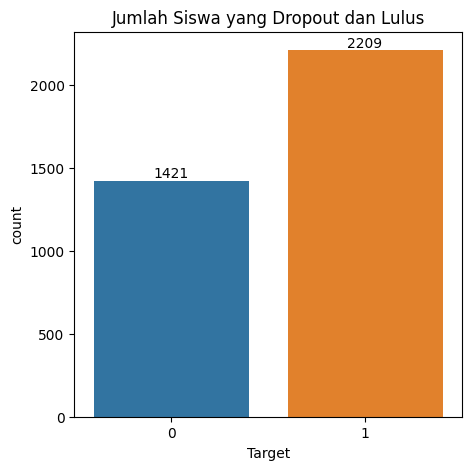

In [ ]:
# Mengecek jumlah siswa yang dropout dan lulus 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Target')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Jumlah Siswa yang Dropout dan Lulus')
plt.show

Tampak bahwa jumlah siswa yang lulus jauh lebih banyak daripada jumlah siswa yang dropout

In [ ]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


# **Modelling tanpa feature selection dan tanpa GAN**
#### Membagi data menjadi X dan y
#### X adalah feature-feature yang digunakan
#### y adalah kolom yang akan kita prediksi, yaitu Target

In [ ]:
# Memisahkan variabel independen (X) dengan variabel dependen (y)
X = df.drop(['Target'], axis = 1)
y = df['Target']

print(X.shape)
print(y.shape)

(3630, 36)
(3630,)


#### Melakukan Standarisasi

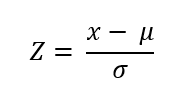

In [ ]:
# Fungsi untuk melakukan standarisasi
# Penjelasan parameter:
# df: dataframe yang akan distandarisasi
def standarisasi(df):
    return (df - df.mean()) / df.std()

In [ ]:
# Melakukan standarisasi pada setiap feature di X
X = standarisasi(X)

In [ ]:
# Mengubah X menjadi array agar bisa dilakukan modelling
X = X.values
X

array([[-0.30064416, -0.08190542,  2.43648682, ..., -0.3112693 ,
         0.12159784,  0.77401201],
       [-0.30064416, -0.19712212, -0.56239329, ...,  0.85080136,
        -1.1059177 ,  0.3536554 ],
       [-0.30064416, -1.003639  ,  2.43648682, ..., -0.3112693 ,
         0.12159784,  0.77401201],
       ...,
       [-0.30064416, -1.003639  , -0.56239329, ...,  0.85080136,
        -1.1059177 ,  0.3536554 ],
       [-0.30064416, -1.003639  , -0.56239329, ..., -0.8360754 ,
        -1.46695169, -1.37644392],
       [-0.30064416, -0.48516386, -0.56239329, ...,  0.40096756,
         1.78235416, -0.7481214 ]])

In [ ]:
# Inisiasi array kosong untuk menampung rata-rata akurasi prediksi dari tiap model
avg_train_arr = []
avg_test_arr = []

In [ ]:
# Fungsi untuk menghitung akurasi
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

#### **Fungsi untuk melakukan prediksi menggunakan setiap model dan menampilkan akurasi setiap hasil prediksinya**

In [ ]:
def prediksi(model):
    # Melakukan KFold Validation
    k = 5
    kf = KFold(n_splits=k, random_state=None)
    
    accuracy_train = []
    accuracy_test = []

    for train_index , test_index in kf.split(X):
        X_train , X_test = X[train_index,:], X[test_index,:]
        y_train , y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fitting dan Predict data train dan test
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        # Menghitung akurasi hasil prediksi
        acc = accuracy(pred_train , y_train)
        accuracy_train.append(acc)
        acc = accuracy(pred_test , y_test)
        accuracy_test.append(acc)
        
    avg_train = sum(accuracy_train)/k
    avg_train_arr.append(avg_train)
    avg_test = sum(accuracy_test)/k
    avg_test_arr.append(avg_test)
    
    # Menampilkan akurasi hasil prediksi
    print('Akurasi setiap fold pada data train: {}'.format(accuracy_train))
    print('Rata-rata akurasi seluruh fold pada data train: {}'.format(avg_train))
    print('Akurasi setiap fold pada data test: {}'.format(accuracy_test))
    print('Rata-rata akurasi seluruh fold pada data test: {}'.format(avg_test))

## **Logistic Regression**

In [ ]:
class ModelLogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Inisialisasi parameter
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Optimisasi dengan gradient descent
        for _ in range(self.n_iters):
            # Memprediksikan output (y) dengan linar combinasi weight dan x, ditambah dengan bias
            linear_model = np.dot(X, self.weights) + self.bias
            # Menerapkan fungsi sigmoid
            y_predicted = self._sigmoid(linear_model)

            # Komputasi gradient
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))   # Derivative w.r.t weights
            db = (1 / n_samples) * np.sum(y_predicted - y)          # Derivative w.r.t bias
            # Update parameter weight dan bias untuk mendapat nilai optimal
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


In [ ]:
logistic = ModelLogisticRegression(learning_rate=0.0001, n_iters=2000)

prediksi(logistic)

Akurasi setiap fold pada data train: [0.8584710743801653, 0.8539944903581267, 0.8643250688705234, 0.8657024793388429, 0.8643250688705234]
Rata-rata akurasi seluruh fold pada data train: 0.8613636363636363
Akurasi setiap fold pada data test: [0.8526170798898072, 0.8746556473829201, 0.8553719008264463, 0.8526170798898072, 0.8539944903581267]
Rata-rata akurasi seluruh fold pada data test: 0.8578512396694216


## **Naive Bayes**

In [ ]:
class ModelNaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # menghitung mean, var, dan prior untuk masing-masing class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # menghitung posterior probability
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = posterior + prior
            posteriors.append(posterior)

        # return class dengan posterior probability paling besar
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

In [ ]:
nb = ModelNaiveBayes()

prediksi(nb)

Akurasi setiap fold pada data train: [0.837465564738292, 0.8398760330578512, 0.8453856749311295, 0.8443526170798898, 0.8450413223140496]
Rata-rata akurasi seluruh fold pada data train: 0.8424242424242424
Akurasi setiap fold pada data test: [0.8567493112947658, 0.8567493112947658, 0.8429752066115702, 0.8223140495867769, 0.8292011019283747]
Rata-rata akurasi seluruh fold pada data test: 0.8415977961432507


## **Perceptron**

In [ ]:
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

class ModelPerceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # inisiasi parameternya
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.where(y > 0 , 1, 0)

        # menghitung dan evaluasi weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # update weight
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

In [ ]:
p = ModelPerceptron(learning_rate=0.01, n_iters=1000)

prediksi(p)

Akurasi setiap fold pada data train: [0.8805096418732782, 0.8770661157024794, 0.8825757575757576, 0.8860192837465565, 0.8543388429752066]
Rata-rata akurasi seluruh fold pada data train: 0.8761019283746556
Akurasi setiap fold pada data test: [0.9049586776859504, 0.8705234159779615, 0.8801652892561983, 0.8732782369146006, 0.8636363636363636]
Rata-rata akurasi seluruh fold pada data test: 0.8785123966942148


## **Support Vector Machine**

In [ ]:
class ModelSVM():

  # Inisialisasi parameter
  def __init__(self, learning_rate, no_of_iterations, lambda_parameter):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations
    self.lambda_parameter = lambda_parameter

  # Menyesuaikan data untuk SVM Classifier
  def fit(self, X, Y):

    # m  --> banyaknya data points --> banyaknya baris (rows)
    # n  --> banyaknya input features --> banyaknya kolom (columns)
    self.m, self.n = X.shape

    # Inisialisasi nilai-nilai weight dan bias
    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # Optimisasi dengan cara implementasi algoritma gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  # Function untuk meng-update nilai-nilai weights dan bias
  def update_weights(self):
    # Pelabelan klasifikasi pada output
    y_label = np.where(self.Y <= 0, -1, 1)

    # Menghitung gradient ( dw, db)
    for index, x_i in enumerate(self.X):
      condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1

      if (condition == True):
        dw = 2 * self.lambda_parameter * self.w
        db = 0

      else:
        dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
        db = y_label[index]

      self.w = self.w - self.learning_rate * dw
      self.b = self.b - self.learning_rate * db

  # Prediksikan label untuk input yang diberikan
  def predict(self, X):

    output = np.dot(X, self.w) - self.b

    predicted_labels = np.sign(output)

    y_hat = np.where(predicted_labels <= -1, 0, 1)

    return y_hat  

In [ ]:
svm = ModelSVM(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

prediksi(svm)

Akurasi setiap fold pada data train: [0.9128787878787878, 0.9135674931129476, 0.9166666666666666, 0.9121900826446281, 0.9135674931129476]
Rata-rata akurasi seluruh fold pada data train: 0.9137741046831955
Akurasi setiap fold pada data test: [0.9201101928374655, 0.9201101928374655, 0.9035812672176309, 0.8980716253443526, 0.8994490358126722]
Rata-rata akurasi seluruh fold pada data test: 0.9082644628099172


In [ ]:
nama_model = ['Logistic Regression', 'Naive Bayes', 'Perceptron', 'SVM']

In [ ]:
print(avg_train_arr)
print(avg_test_arr)

[0.8613636363636363, 0.8424242424242424, 0.8761019283746556, 0.9137741046831955]
[0.8578512396694216, 0.8415977961432507, 0.8785123966942148, 0.9082644628099172]


## **Komparasi tingkat akurasi masing-masing model**

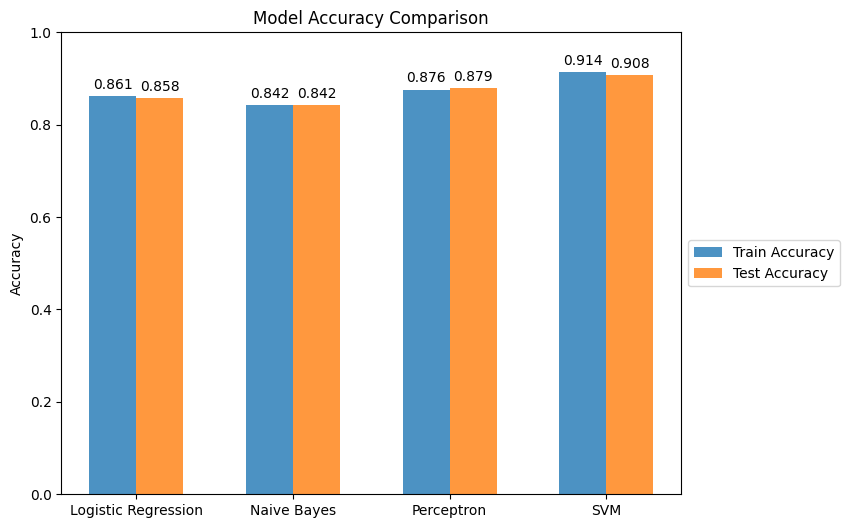

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Lebar setiap bar
bar_width = 0.3

# Array untuk sumbu x
x_pos = np.arange(len(nama_model))

# Plot untuk akurasi train
train_bars = ax.bar(x_pos, avg_train_arr, width=bar_width, align='center', alpha=0.8, label='Train Accuracy')

# Plot untuk akurasi test
test_bars = ax.bar(x_pos + bar_width, avg_test_arr, width=bar_width, align='center', alpha=0.8, label='Test Accuracy')

ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(nama_model)

ax.set_ylabel('Accuracy')

ax.set_title('Model Accuracy Comparison')

# Untuk memberikan annotation di setiap puncak bar
for bar1, bar2 in zip(train_bars, test_bars):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.3f}', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    ax.annotate(f'{height2:.3f}', xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_ylim(0, 1)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

Tampak bahwa **tidak** terjadi overfitting dan **tidak** terjadi underfitting. <br>
Hasil akurasi **terbaik** didapatkan oleh **model Support Vector Machine (SVM)** dengan tingkat akurasi pada data train dan test sebesar **91%** 

## **Data Augmentation using GAN**
### **Membuat fungsi generator dan discriminator untuk GAN**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Generator
def make_generator_model(input_shape=10):
    model = tf.keras.Sequential()
    model.add(Dense(256, use_bias=True, input_shape=(input_shape,)))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(Dense(512))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(Dense(1024))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(Dense(input_shape+1, activation='tanh'))  
    return model

# Diskriminator
def make_discriminator_model(input_shape=10):
    model = tf.keras.Sequential()
    model.add(Dense(1024, use_bias=True, input_shape=(input_shape+1,)))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(Dense(512))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(Dense(256))
    model.add(tf.keras.layers.LeakyReLU())

    model.add(Dense(1)) 
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

@tf.function
def train_step(real_samples):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_samples = generator(noise, training=True)

        real_output = discriminator(real_samples, training=True)
        fake_output = discriminator(generated_samples, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

def train_GAN(dataset, epochs):
    for epoch in range(epochs):
        for data_batch in dataset:
            train_step(data_batch)

In [ ]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data agar ada di range -1 sampai 1
scaler = MinMaxScaler(feature_range=(-1, 1))
df_scaled = scaler.fit_transform(df)

# Parameter GAN
input_shape = df.shape[1] - 1 
NOISE_DIM = input_shape  
BATCH_SIZE = 32

train_dataset = tf.data.Dataset.from_tensor_slices(df_scaled).batch(BATCH_SIZE)

# Define komponen GAN
generator = make_generator_model(input_shape)
discriminator = make_discriminator_model(input_shape)

# Optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(real_samples):
    noise = tf.random.normal([BATCH_SIZE, NOISE_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_samples = generator(noise, training=True)

        real_output = discriminator(real_samples, training=True)
        fake_output = discriminator(generated_samples, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Loop training
train_GAN(train_dataset, epochs=3000)

# Generate data sintesis
noise = tf.random.normal([1000, NOISE_DIM])  # Kita akan mengenerate 1000 data
generated_data = generator(noise, training=False)

df_synthetic = scaler.inverse_transform(generated_data)
df_synthetic = pd.DataFrame(df_synthetic, columns=df.columns)

df_synthetic["Target"] = df_synthetic["Target"].apply(round)

print(df_synthetic)

     Marital status  Application mode  Application order       Course  \
0          1.000736          1.015282           1.094296  9373.743715   
1          1.000275          6.973608           3.272815  9624.521887   
2          1.000191          1.000000           0.969124  9605.754649   
3          1.000128         19.750446           3.909615  9472.973727   
4          1.000401         13.515165           3.626505  9439.965017   
..              ...               ...                ...          ...   
995        1.231963         41.489559           0.963845  9510.637298   
996        1.000365          1.000000           2.100440  9798.324351   
997        1.007148          1.000274           0.966551  9345.020090   
998        1.001638         19.534708           3.072585  9291.957341   
999        1.000075         17.851196           2.959118  9350.612749   

     Daytime/evening attendance\t  Previous qualification  \
0                             1.0                1.041740   
1

In [ ]:
# Menyimpan data yang digenerate menggunakan GAN agar tidak perlu run ulang cell di atas, mengingat waktu run yang cukup lama
df_synthetic.to_csv("generated_by_GAN.csv", index=False)

### **Menampilkan data yang berhasil digenerate menggunakan GAN**

In [ ]:
df_gan = pd.read_csv('generated_by_GAN.csv')
df_gan

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.000736,1.015282,1.094296,9373.743715,1.0,1.041740,157.489772,1.007905,12.929887,12.749970,...,0.013802,7.212276,8.083934,8.232954,14.509268,0.001875,11.095443,0.596955,1.951115,1
1,1.000275,6.973608,3.272815,9624.521887,1.0,1.000145,146.945654,1.028218,1.013754,3.906080,...,0.007315,7.856081,8.583530,8.494172,13.136489,0.000228,11.050694,0.616452,1.952938,1
2,1.000191,1.000000,0.969124,9605.754649,1.0,1.000043,170.154522,1.048145,32.062307,37.164617,...,0.020294,8.583005,8.793617,8.656415,15.518170,0.003472,10.821507,1.406243,1.673061,1
3,1.000128,19.750446,3.909615,9472.973727,1.0,1.001170,143.483913,1.099659,2.806420,1.252303,...,0.010274,7.206520,6.157772,8.622764,13.672950,0.000087,12.398431,0.473661,1.697486,1
4,1.000401,13.515165,3.626505,9439.965017,1.0,1.000345,130.413781,1.306078,10.233695,33.102885,...,0.000000,4.886521,0.077022,0.000119,0.000000,0.000717,8.964085,1.420452,3.508601,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.231963,41.489559,0.963845,9510.637298,0.0,1.351659,123.747029,1.000299,37.023604,39.325381,...,0.000272,6.672147,8.378946,7.265939,13.850928,0.000008,11.056800,0.594959,2.020683,1
996,1.000365,1.000000,2.100440,9798.324351,1.0,1.000006,160.448055,1.013908,1.448802,37.698158,...,0.005429,8.296076,7.592330,9.050851,14.745275,0.000548,11.043657,0.613695,1.953057,1
997,1.007148,1.000274,0.966551,9345.020090,1.0,1.000175,142.221854,1.029042,2.446310,19.289242,...,0.004459,5.569953,7.666446,5.553512,11.376813,0.008926,13.985967,-0.348134,0.708683,1
998,1.001638,19.534708,3.072585,9291.957341,1.0,1.091216,136.159591,1.021562,1.357073,2.458007,...,0.000738,5.894640,8.885729,2.439230,11.585198,0.044511,10.781042,1.407995,1.658050,0


#### Menggabungkan hasil GAN ke dataframe original

In [ ]:
# Menggabungkan df_gan ke df menggunakan concat
df = pd.concat([df, df_gan])
df = df.reset_index(drop=True)

df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.000000,17.000000,5.000000,171.000000,1.0,1.000000,122.000000,1.000000,19.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.800000,1.400000,1.740000,0
1,1.000000,15.000000,1.000000,9254.000000,1.0,1.000000,160.000000,1.000000,1.000000,3.000000,...,0.000000,6.000000,6.000000,6.000000,13.666667,0.000000,13.900000,-0.300000,0.790000,1
2,1.000000,1.000000,5.000000,9070.000000,1.0,1.000000,122.000000,1.000000,37.000000,37.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,10.800000,1.400000,1.740000,0
3,1.000000,17.000000,2.000000,9773.000000,1.0,1.000000,122.000000,1.000000,38.000000,37.000000,...,0.000000,6.000000,10.000000,5.000000,12.400000,0.000000,9.400000,-0.800000,-3.120000,1
4,2.000000,39.000000,1.000000,8014.000000,0.0,1.000000,100.000000,1.000000,37.000000,38.000000,...,0.000000,6.000000,6.000000,6.000000,13.000000,0.000000,13.900000,-0.300000,0.790000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,1.231963,41.489559,0.963845,9510.637298,0.0,1.351659,123.747029,1.000299,37.023604,39.325381,...,0.000272,6.672147,8.378946,7.265939,13.850928,0.000008,11.056800,0.594959,2.020683,1
4626,1.000365,1.000000,2.100440,9798.324351,1.0,1.000006,160.448055,1.013908,1.448802,37.698158,...,0.005429,8.296076,7.592330,9.050851,14.745275,0.000548,11.043657,0.613695,1.953057,1
4627,1.007148,1.000274,0.966551,9345.020090,1.0,1.000175,142.221854,1.029042,2.446310,19.289242,...,0.004459,5.569953,7.666446,5.553512,11.376813,0.008926,13.985967,-0.348134,0.708683,1
4628,1.001638,19.534708,3.072585,9291.957341,1.0,1.091216,136.159591,1.021562,1.357073,2.458007,...,0.000738,5.894640,8.885729,2.439230,11.585198,0.044511,10.781042,1.407995,1.658050,0


# **Modelling dengan menggunakan Feature Selection**
### **Split Data untuk Anova Feature Selection**

In [ ]:
X = df.drop(['Target'], axis = 1)
y = df['Target']

print(X.shape)
print(y.shape)

(4630, 36)
(4630,)


In [ ]:
# Fungsi untuk melakukan standarisasi
# Penjelasan parameter:
# df: dataframe yang akan distandarisasi
def standarisasi(df):
    return (df - df.mean()) / df.std()

In [ ]:
# Melakukan standarisasi pada setiap feature di X
X = standarisasi(X)

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=92)
X_train.shape, X_test.shape

((3704, 36), (926, 36))

## **Fungsi ANOVA untuk Feature Selection**

In [ ]:
def anova_f_value(X, y):
    # Number of distinct classes
    classes = np.unique(y)

    # Overall mean
    overall_mean = np.mean(X, axis=0)

    # Between class variability
    S_B = 0
    for c in classes:
        class_data = X[y == c]
        class_mean = np.mean(class_data, axis=0)
        S_B += len(class_data) * np.sum((class_mean - overall_mean)**2)

    # Within class variability
    S_W = 0
    for c in classes:
        class_data = X[y == c]
        class_mean = np.mean(class_data, axis=0)
        S_W += np.sum((class_data - class_mean)**2)

    # Compute ANOVA F-value
    F = S_B / S_W

    return F

In [ ]:
# Menampilkan F-value dari setiap feature
f_values = anova_f_value(X, y)
df_copy = df
feature_names = df_copy.drop('Target', axis=1).columns
for i in range(len(feature_names)):
    print(f"Feature {feature_names[i]}: {f_values[i]}")

Feature Marital status: 2.253717615861529
Feature Application mode: 2.377164811953623
Feature Application order: 2.2430990450850707
Feature Course: 2.2298806004430354
Feature Daytime/evening attendance	: 2.246254777134584
Feature Previous qualification: 2.235419072248392
Feature Previous qualification (grade): 2.284512750964904
Feature Nacionality: 2.2235467863994534
Feature Mother's qualification: 2.237342961138449
Feature Father's qualification: 2.223582250478292
Feature Mother's occupation: 2.2221740125608074
Feature Father's occupation: 2.222299343178232
Feature Admission grade: 2.268896532373186
Feature Displaced: 2.2666737313499516
Feature Educational special needs: 2.2225119448218456
Feature Debtor: 2.4002799910056587
Feature Tuition fees up to date: 2.7941516463085536
Feature Gender: 2.364251033250847
Feature Scholarship holder: 2.455281691070415
Feature Age at enrollment: 2.4348835619039533
Feature International: 2.2223448811463427
Feature Curricular units 1st sem (credited): 

### **Memvisualisasikan nilai F dari setiap feature**

c:\Users\Nando\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


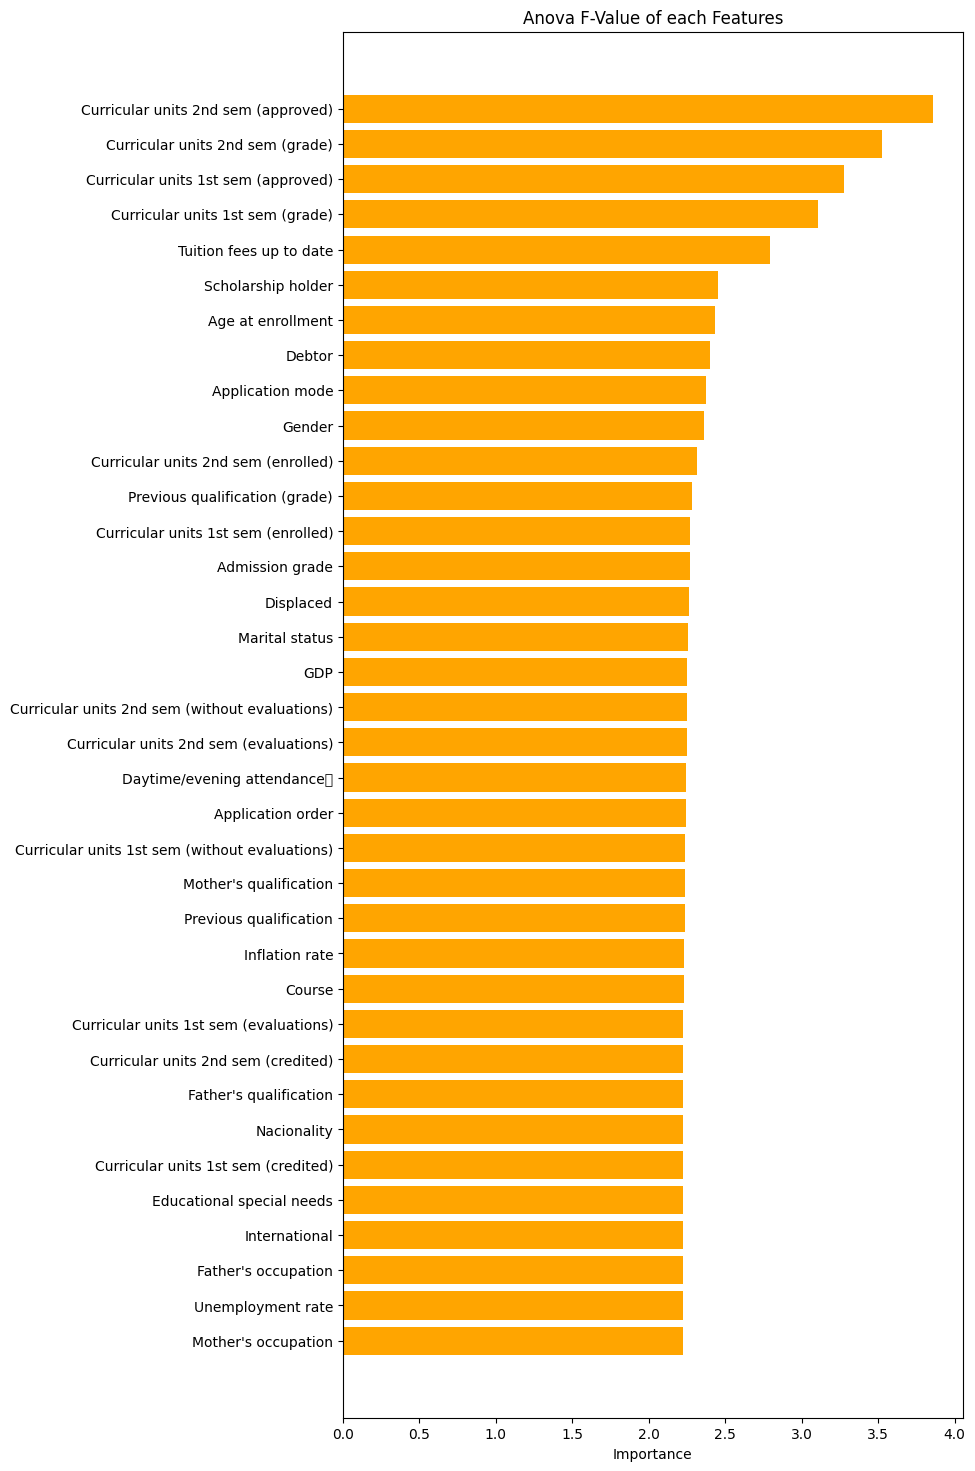

In [ ]:
feature_selection = dict(zip(feature_names, f_values))

# Mengurutkan dari F-value tertinggi
sorted_features = sorted(feature_selection.items(), key=lambda x: x[1], reverse=True)

features, importance = zip(*sorted_features)

# Membuat barplot
plt.figure(figsize=(8, len(features)/2))
plt.barh(features, importance, color='orange')
plt.xlabel('Importance')
plt.title('Anova F-Value of each Features')
plt.gca().invert_yaxis() 
plt.show()

### **Drop 3 feature yang nilai F nya paling kecil**

In [ ]:
least_important_features_indices = np.argsort(f_values)[:3]

# 3 feature dengan F-value terendah
least_important_features = df.columns[:-1][least_important_features_indices]

print("The three least important features are:", least_important_features)

The three least important features are: Index(['Mother's occupation', 'Unemployment rate', 'Father's occupation'], dtype='object')


In [ ]:
df = df.drop(least_important_features, axis=1)

### **Split Data untuk melakukan modelling setelah melakukan data augmentation menggunakan GAN dan setelah melakukan feature selection menggunakan ANOVA**

In [ ]:
X = df.drop(['Target'], axis = 1)
y = df['Target']

print(X.shape)
print(y.shape)

(4630, 33)
(4630,)


In [ ]:
# Fungsi untuk melakukan standarisasi
# Penjelasan parameter:
# df: dataframe yang akan distandarisasi
def standarisasi(df):
    return (df - df.mean()) / df.std()

In [ ]:
# Melakukan standarisasi pada setiap feature di X
X = standarisasi(X)

In [ ]:
X = X.values
X

array([[-0.27454126, -0.02156012,  2.27418056, ..., -0.17251213,
         0.23597979,  0.62215397],
       [-0.27454126, -0.14010869, -0.59970686, ..., -0.17251213,
        -1.09131736,  0.18450006],
       [-0.27454126, -0.9699487 ,  2.27418056, ..., -0.17251213,
         0.23597979,  0.62215397],
       ...,
       [-0.26162386, -0.96993247, -0.62373915, ..., -0.15908186,
        -1.12889851,  0.1470383 ],
       [-0.27158174,  0.12868291,  0.88938716, ..., -0.10553675,
         0.24222201,  0.58440055],
       [-0.27440553,  0.02889391,  0.80786452, ..., -0.17134119,
        -0.44100552,  0.60265772]])

In [ ]:
# Inisiasi array kosong untuk menampung hasil akurasi dari setiap model
avg_train_arr_after = []
avg_test_arr_after = []

### **Fungsi untuk melakukan prediksi setelah melakukan data augmentation dan feature selection**

In [ ]:
def prediksi_after(model):
    # Melakukan K-Fold Validation
    k = 5
    kf = KFold(n_splits=k, random_state=None)
    
    accuracy_train = []
    accuracy_test = []

    for train_index , test_index in kf.split(X):
        X_train , X_test = X[train_index,:], X[test_index,:]
        y_train , y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Fitting dan Predict data train dan test
        model.fit(X_train,y_train)
        pred_train = model.predict(X_train)
        pred_test = model.predict(X_test)

        # Menghitung akurasi hasil prediksi
        acc = accuracy(pred_train , y_train)
        accuracy_train.append(acc)
        acc = accuracy(pred_test , y_test)
        accuracy_test.append(acc)
        
    avg_train = sum(accuracy_train)/k
    avg_train_arr_after.append(avg_train)
    avg_test = sum(accuracy_test)/k
    avg_test_arr_after.append(avg_test)
    
    # Menampilkan akurasi hasil prediksi
    print('Akurasi setiap fold pada data train: {}'.format(accuracy_train))
    print('Rata-rata akurasi seluruh fold pada data train: {}'.format(avg_train))
    print('Akurasi setiap fold pada data test: {}'.format(accuracy_test))
    print('Rata-rata akurasi seluruh fold pada data test: {}'.format(avg_test))

## **Logistic Regression**

In [ ]:
logistic = ModelLogisticRegression(learning_rate=0.0001, n_iters=2000)

prediksi_after(logistic)

Akurasi setiap fold pada data train: [0.8628509719222462, 0.8623110151187905, 0.8669006479481641, 0.8639308855291576, 0.8598812095032398]
Rata-rata akurasi seluruh fold pada data train: 0.8631749460043195
Akurasi setiap fold pada data test: [0.8358531317494601, 0.8660907127429806, 0.8444924406047516, 0.8617710583153347, 0.8930885529157667]
Rata-rata akurasi seluruh fold pada data test: 0.8602591792656588


## **Naive Bayes**

In [ ]:
nb = ModelNaiveBayes()

prediksi_after(nb)

Akurasi setiap fold pada data train: [0.8409827213822895, 0.8428725701943844, 0.8512419006479481, 0.8474622030237581, 0.8409827213822895]
Rata-rata akurasi seluruh fold pada data train: 0.8447084233261339
Akurasi setiap fold pada data test: [0.8412526997840173, 0.8358531317494601, 0.8056155507559395, 0.826133909287257, 0.8920086393088553]
Rata-rata akurasi seluruh fold pada data test: 0.8401727861771058


## **Perceptron**

In [ ]:
p = ModelPerceptron(learning_rate=0.01, n_iters=1000)

prediksi_after(p)

Akurasi setiap fold pada data train: [0.8615010799136069, 0.8879589632829373, 0.8938984881209503, 0.8226241900647948, 0.8685205183585313]
Rata-rata akurasi seluruh fold pada data train: 0.8669006479481641
Akurasi setiap fold pada data test: [0.8660907127429806, 0.8758099352051836, 0.8606911447084233, 0.8002159827213823, 0.9049676025917927]
Rata-rata akurasi seluruh fold pada data test: 0.8615550755939525


## **Support Vector Machine (SVM)**

In [ ]:
svm = ModelSVM(learning_rate=0.001, no_of_iterations=1000, lambda_parameter=0.01)

prediksi_after(svm)

Akurasi setiap fold pada data train: [0.9095572354211663, 0.9125269978401728, 0.9138768898488121, 0.9154967602591793, 0.9136069114470843]
Rata-rata akurasi seluruh fold pada data train: 0.9130129589632829
Akurasi setiap fold pada data test: [0.9190064794816415, 0.9136069114470843, 0.8866090712742981, 0.8930885529157667, 0.91792656587473]
Rata-rata akurasi seluruh fold pada data test: 0.906047516198704


In [ ]:
print(avg_train_arr_after)
print(avg_test_arr_after)

[0.8631749460043195, 0.8447084233261339, 0.8669006479481641, 0.9130129589632829]
[0.8602591792656588, 0.8401727861771058, 0.8615550755939525, 0.906047516198704]


## **Komparasi Akurasi Hasil Prediksi Setelah Menggunakan ANOVA Feature Selection dan Data Augmentation GAN**

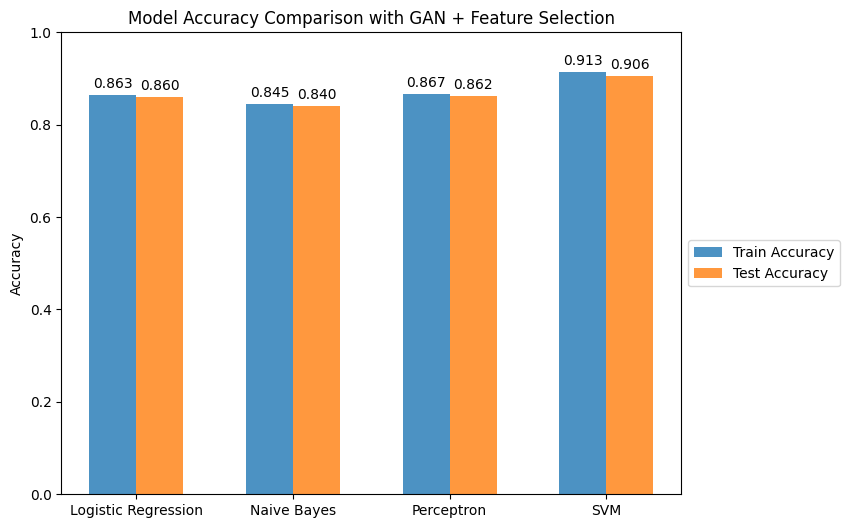

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

# Lebar setiap bar
bar_width = 0.3

# Array untuk sumbu X
x_pos = np.arange(len(nama_model))

# Plot untuk train
train_bars = ax.bar(x_pos, avg_train_arr_after, width=bar_width, align='center', alpha=0.8, label='Train Accuracy')

# Plot untuk test
test_bars = ax.bar(x_pos + bar_width, avg_test_arr_after, width=bar_width, align='center', alpha=0.8, label='Test Accuracy')

ax.set_xticks(x_pos + bar_width / 2)
ax.set_xticklabels(nama_model)

ax.set_ylabel('Accuracy')

ax.set_title('Model Accuracy Comparison with GAN + Feature Selection')

# Untuk annotation di setiap puncak bar
for bar1, bar2 in zip(train_bars, test_bars):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax.annotate(f'{height1:.3f}', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    ax.annotate(f'{height2:.3f}', xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax.set_ylim(0, 1) 

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## **Komparasi akurasi sebelum dan sesudah data augmentation + feature selection**

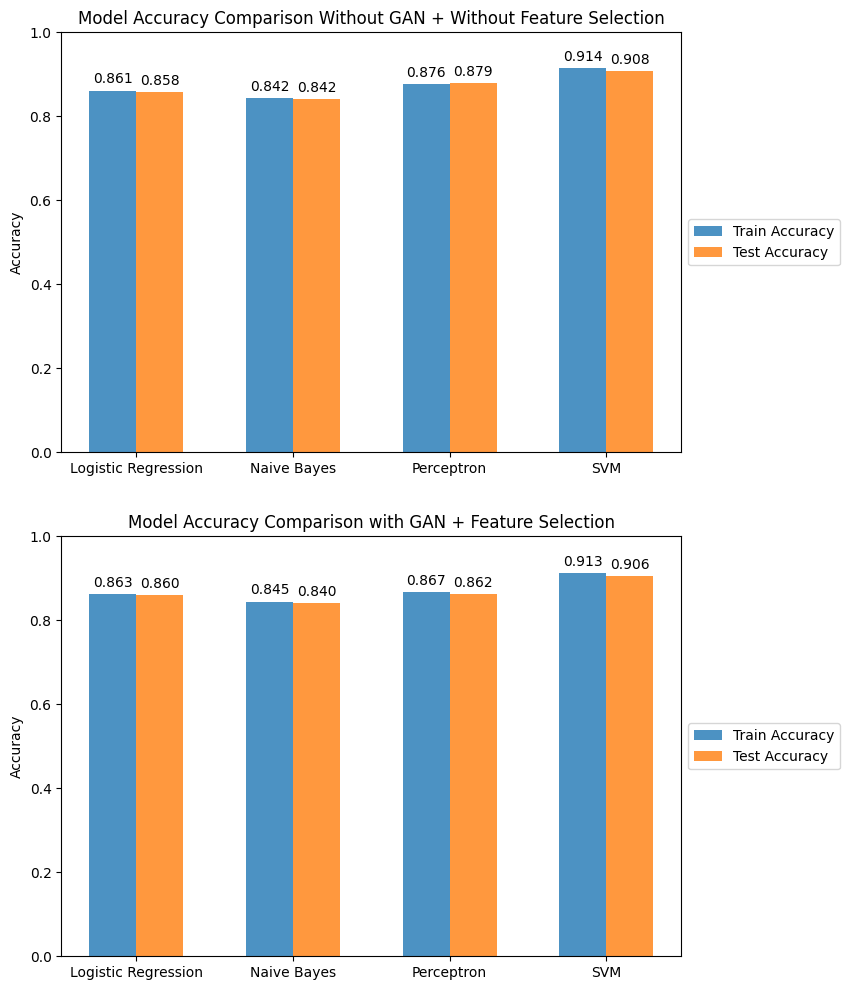

In [ ]:
fig, ax = plt.subplots(2, figsize=(8, 12))

# Lebar setiap bar
bar_width = 0.3

# Array untuk sumbu X
x_pos1 = np.arange(len(nama_model))

# Plot untuk train
train_bars1 = ax[0].bar(x_pos1, avg_train_arr, width=bar_width, align='center', alpha=0.8, label='Train Accuracy')

# Plot untuk test
test_bars1 = ax[0].bar(x_pos1 + bar_width, avg_test_arr, width=bar_width, align='center', alpha=0.8, label='Test Accuracy')

ax[0].set_xticks(x_pos1 + bar_width / 2)
ax[0].set_xticklabels(nama_model)

ax[0].set_ylabel('Accuracy')

ax[0].set_title('Model Accuracy Comparison Without GAN + Without Feature Selection')

# Untuk annotation
for bar1, bar2 in zip(train_bars1, test_bars1):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax[0].annotate(f'{height1:.3f}', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    ax[0].annotate(f'{height2:.3f}', xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax[0].set_ylim(0, 1)  

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Untuk plot kedua

x_pos2 = np.arange(len(nama_model))

train_bars2 = ax[1].bar(x_pos2, avg_train_arr_after, width=bar_width, align='center', alpha=0.8, label='Train Accuracy')

test_bars2 = ax[1].bar(x_pos2 + bar_width, avg_test_arr_after, width=bar_width, align='center', alpha=0.8, label='Test Accuracy')

ax[1].set_xticks(x_pos2 + bar_width / 2)
ax[1].set_xticklabels(nama_model)

ax[1].set_ylabel('Accuracy')

ax[1].set_title('Model Accuracy Comparison with GAN + Feature Selection')

for bar1, bar2 in zip(train_bars2, test_bars2):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    ax[1].annotate(f'{height1:.3f}', xy=(bar1.get_x() + bar1.get_width() / 2, height1),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
    ax[1].annotate(f'{height2:.3f}', xy=(bar2.get_x() + bar2.get_width() / 2, height2),
                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

ax[1].set_ylim(0, 1) 

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

## **Statistical Analysis ANOVA untuk membandingkan akurasi antara sebelum dan sesudah feature selection + GAN**

In [ ]:
akurasi_setiap_model_before = [0.8578512396694216, 0.8415977961432507, 0.8785123966942148, 0.9082644628099172]
akurasi_setiap_model_after = [0.8602591792656588, 0.8401727861771058, 0.8615550755939525, 0.906047516198704]

# Menghitung rata-rata
mean1 = sum(akurasi_setiap_model_before) / len(akurasi_setiap_model_before)
mean2 = sum(akurasi_setiap_model_after) / len(akurasi_setiap_model_after)

# Menghitung sum of squares within groups
ssw1 = sum((x - mean1) ** 2 for x in akurasi_setiap_model_before)
ssw2 = sum((x - mean2) ** 2 for x in akurasi_setiap_model_after)

# Menghitung sum of squares between groups
ssb = len(akurasi_setiap_model_before) * ((mean1 - mean2) ** 2)

# Menghitung degrees of freedom
df1 = len(akurasi_setiap_model_before) - 1
df2 = len(akurasi_setiap_model_after) - 1

# Menghitung mean square between groups
msb = ssb / 1

# Menghitung mean square within groups
msw = (ssw1 + ssw2) / (df1 + df2)

# Menghitung F-value
f_value = msb / msw

# Menghitung p-value
def fungsi_f_cdf(x, df1, df2):
    numerator = (df1 * x) ** (df1 / 2) * (df2) ** (df2 / 2)
    denominator = (df1 * x + df2) ** ((df1 + df2) / 2)
    return 1 - numerator / denominator

p_value = 1 - fungsi_f_cdf(f_value, 1, df1 + df2)

# Menampilkan hasil
print("Hasil ANOVA:")
print("F-value:", f_value)
print("p-value:", p_value)


Hasil ANOVA:
F-value: 0.1033986863738109
p-value: 0.12365457019052761


## **Fungsi untuk melakukan T-test Statistical Analysis**

In [ ]:
def fungsi_t_test(akurasi_model_before, akurasi_model_after):
    # Menghitung rata-rata
    mean1 = sum(akurasi_model_before) / len(akurasi_model_before)
    mean2 = sum(akurasi_model_after) / len(akurasi_model_after)

    # Menghitung varians
    var1 = sum((x - mean1) ** 2 for x in akurasi_model_before) / (len(akurasi_model_before) - 1)
    var2 = sum((x - mean2) ** 2 for x in akurasi_model_after) / (len(akurasi_model_after) - 1)

    # Menghitung standard error
    se1 = (var1 / len(akurasi_model_before)) ** 0.5
    se2 = (var2 / len(akurasi_model_after)) ** 0.5

    # Menghitung pooled standard error
    pooled_se = ((len(akurasi_model_before) - 1) * var1 + (len(akurasi_model_after) - 1) * var2) / (len(akurasi_model_before) + len(akurasi_model_after) - 2)
    pooled_se = pooled_se ** 0.5

    # Menghitung t-statistic
    t_statistic = (mean1 - mean2) / (pooled_se * ((1 / len(akurasi_model_before)) + (1 / len(akurasi_model_after)))) ** 0.5

    # Menghitung degrees of freedom
    df = len(akurasi_model_before) + len(akurasi_model_after) - 2

    # Menghitung p-value
    def t_cdf(x, df):
        t = abs(x)
        b = df / (df + t * t)
        q = 1 - b
        if df % 2 == 0:
            s = 1
        else:
            s = (2 * (1 - b)) ** 0.5
        if t < (df - 1) / (df + 1):
            cdf = 0.5 * (1 + s * (t / (1 - b * t * t)) * (1 - q / (df - 1)))
        else:
            cdf = 0.5 * (1 - s * (q / (t * (1 - b * t * t)) - 1 / (df + 1)))
        if x < 0:
            cdf = 1 - cdf
        return cdf

    p_value = 1 - t_cdf(t_statistic, df)

    # Menampilkan hasil
    print("p-value:", p_value)

## **T-test Logistic Regression Before & After GAN + Feature Selection**

In [ ]:
akurasi_logistic_regression_before = [0.8526170798898072, 0.8746556473829201, 0.8553719008264463, 0.8526170798898072, 0.8539944903581267]
akurasi_logistic_regression_after = [0.8358531317494601, 0.8660907127429806, 0.8444924406047516, 0.8617710583153347, 0.8930885529157667]

print("Hasil T-test Logistic Regression:")
fungsi_t_test(akurasi_logistic_regression_before, akurasi_logistic_regression_after)

Hasil T-test Logistic Regression:
p-value: 0.5146053879988526


## **T-test Naive Bayes Before & After GAN + Feature Selection**

In [ ]:
akurasi_naive_bayes_before = [0.8567493112947658, 0.8567493112947658, 0.8429752066115702, 0.8223140495867769, 0.8292011019283747]
akurasi_naive_bayes_after = [0.8412526997840173, 0.8358531317494601, 0.8056155507559395, 0.826133909287257, 0.8920086393088553]

print("Hasil T-test Naive Bayes:")
fungsi_t_test(akurasi_naive_bayes_before, akurasi_naive_bayes_after)

Hasil T-test Naive Bayes:
p-value: 0.4929033879685083


## **T-test Perceptron Before & After GAN + Feature Selection**

In [ ]:
akurasi_perceptron_before = [0.9049586776859504, 0.8705234159779615, 0.8801652892561983, 0.8732782369146006, 0.8636363636363636]
akurasi_perceptron_after = [0.8660907127429806, 0.8758099352051836, 0.8606911447084233, 0.8002159827213823, 0.9049676025917927]

print("Hasil T-test Perceptron:")
fungsi_t_test(akurasi_perceptron_before, akurasi_perceptron_after)

Hasil T-test Perceptron:
p-value: 0.41980927804975443


## **T-test SVM Before & After GAN + Feature Selection**

In [ ]:
akurasi_svm_before = [0.9201101928374655, 0.9201101928374655, 0.9035812672176309, 0.8980716253443526, 0.8994490358126722]
akurasi_svm_after = [0.9190064794816415, 0.9136069114470843, 0.8866090712742981, 0.8930885529157667, 0.91792656587473]

print("Hasil T-test SVM:")
fungsi_t_test(akurasi_svm_before, akurasi_svm_after)

Hasil T-test SVM:
p-value: 0.4847373184401299


# **Sekian dan Terima Kasih**